# Algorytm "Branch and Bound"

Algorytm ten znany też jest jako "cięcia Denkina". Służy do wyznaczania rozwiązań problemów liniowych, w których na niektóre zmienne (być może wszystkie) nałożono warunek całkowitości.

## Po co?

Jako motywację rozważmy [problem komiwojażera](https://pl.wikipedia.org/wiki/Problem_komiwoja%C5%BCera). Dane jest $n$ miast o numerach $0, 1, \ldots, n-1$. Dla każdej pary miast znana jest "odległość" $c_{ij}$ od $i$ do $j$ (rozumiana jako koszt przedostania się z $i$ do $j$ - koszt nie musi spełniać nierównosci trójkąta). Szukamy cyklu (trasy przechodzącej przez wszystkie miasta, zaczynającej i kończącej się w 0) o najmniejszym koszcie. Poniżej przykład: dwanaście miast Sahary Zachodniej oraz cykl o najmniejszej długości przechodzący przez wszystkie miasta. Rozwiążemy ten przykład na laboratorium.

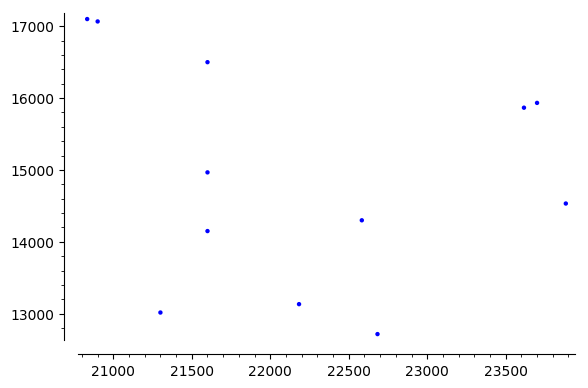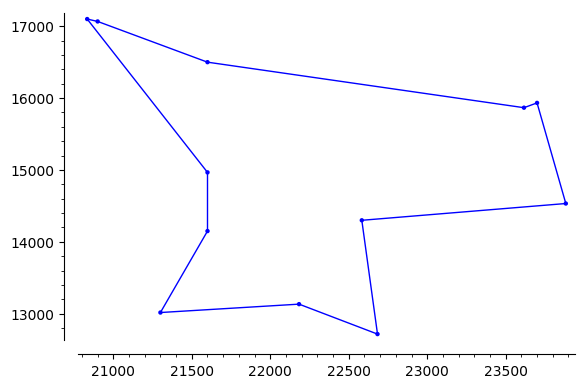

Uwaga: jest to problem [NP-zupełny](https://pl.wikipedia.org/wiki/Problem_NP-zupe%C5%82ny), czyli możemy porzucić nadzieję na znalezienie szybkiego (wielomianowego) algorytmu. Już małe instancje problemu (kilkanaście miast) są beznadziejnie duże dla algorytmów typu brute-force.

Okazuje się, że można ten problem zakodować jako problem liniowy. Niestety, skoro problem jest trudny, są pewne "ale": w zapisie problemu będzie warunek, że pewne zmienne przyjmują wartości całkowite.

### Problem komiwojażera jako problem całkowitoliczbowy

Dla każdej pary miast wprowadzamy zmienną $x_{ij}$ przyjmującą wartość $0$ lub $1$ i kodującą informację, czy nasza trasa będzie zawierała przejście od miasta $i$ do miasta $j$. Oczywiście naszą funkcją celu jest

$$
\sum_i \sum_j c_{ij} x_{ij} \to \min
$$

(minimalizacja kosztu podróży). Po pierwsze chcemy zagwarantować, by nasza trasa była cyklem:

$$
\sum_j x_{ij} = 1 \text{ dla } i = 0, 1, 2, \ldots, n-1
$$
(tylko jedna krawędź wychodząca z miasta $i$, dla każdego $i$)

$$
\sum_i x_{ij} = 1 \text{ dla } j = 0, 1, 2, \ldots, n-1
$$
(tylko jedna krawędź wchodząca do miasta $j$, dla każdego $j$)

Mogłoby się wydawać, że to wystarczające warunki gwarantujące, że nasza trasa jest cyklem. Tak jednak nie jest: program z tymi warunkami dla $12$ miast wskazanych powyżej daje następujący wynik:

<center>
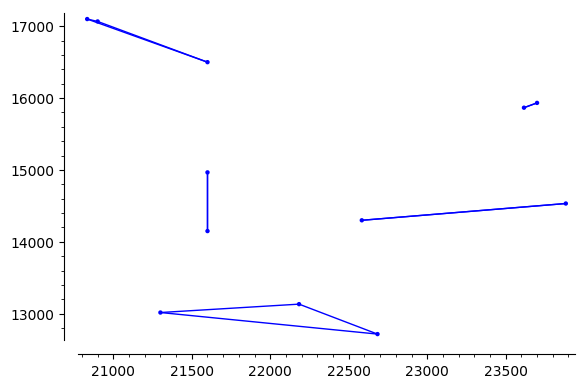
</center>

Rzeczywiście zadane warunki dopuszczają też rozłączne sumy cykli, niezgodne z treścią zadania. Warunek gwarantujący, że cykl jest tylko jeden jest bardziej wymyślny.

Wprowadzamy dla każdego miasta $i$ zmienną $t_i$ kodującą kolejność odwiedzin miast ("czas" odwiedzin). Na zmienne te nakładamy warunki

$$
t_j \geq t_i + 1 - n(1 - x_{ij}) \text{ dla } i \geq 0, j \geq 1, i \neq j
$$

Co oznaczają te warunki? Ciekawy jest człon $n(1 - x_{ij})$: skoro $x_{ij}$ to albo $0$ albo $1$, to dla wartości $x_{ij} = 1$ ten człon po prostu znika i mamy nierówność

$$
t_j \geq t_i + 1 \text{ dla } x_{ij} = 1
$$

czyli jeżeli na naszej trasie jest przejście z miasta $i$ do miasta $j$, to $t_j$ jest **większe** od $t_i$. Z jednym wyjątkiem: nie ma takiego warunku dla $j = 0$. Te warunki eleminują cykle 
krótsze niż cykl przechodzący przez wszystkie miasta.

Dla wartości $x_{ij} = 0$ mamy nierówność $$t_j \geq t_i + 1 - n$$. Jak łatwo zauważyć zmienne $t_i$ zawsze można dobrać tak, by przyjmowały wartości $0, 1, \ldots n-1$, czyli ta nierówość jest po prostu pusta.

Człon $n(1-x_{ij})$ służy więc do *warunkowego* definiowania nierówności. W tym przypadku nierówność jest (efektywnie) w problemie jedynie jeśli $x_{ij}$ jest równe $1$. Nazywa się to **metodą dużego M**. W tym przypadku duże M jest równe $n$.

Problem liniowy (całkowitoliczbowy) z dodanymi zmiennymi $t_i$ daje już prawidłowe rozwiązanie pokazane powyżej.


### Problem całkowitoliczbowy nie jest problemem liniowym

Zanim przejdziemy dalej ważna uwaga: problem z warunkami postaci $x \in \mathbb{Z}$ zazwyczaj nie jest problemem liniowym. Wystarczy spojrzeć na zbiór rozwiązań dopuszczalnych takiego problemu. Warunek $x \in \mathbb{Z}$ definiuje na $\mathbb{R}$ podzbiór, który **nie jest wypukły**. Cała nasza dotychczasowa teoria opiera się na wypukłości zbiorów, po których optymalizujemy. Mimo to zastosujemy ją do problemów całkowitoliczbowych.

## Branch and Bound

Rzecz wyjaśnię na przykładzie. Rozważmy następujący problem

$$
\begin{array}{l}
\begin{array}{lcrcrcl}
 \max \mspace{-6mu}&\mspace{-6mu}  \mspace{-6mu}&\mspace{-6mu} 17 x_{1} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} 12 x_{2} \mspace{-6mu}&\mspace{-6mu}  \mspace{-6mu}&\mspace{-6mu} \\
 \mspace{-6mu}&\mspace{-6mu}  \mspace{-6mu}&\mspace{-6mu} 10 x_{1} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} 7 x_{2} \mspace{-6mu}&\mspace{-6mu} \leq \mspace{-6mu}&\mspace{-6mu} 40 \\
 \mspace{-6mu}&\mspace{-6mu}  \mspace{-6mu}&\mspace{-6mu} x_{1} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} x_{2} \mspace{-6mu}&\mspace{-6mu} \leq \mspace{-6mu}&\mspace{-6mu} 5 \\
\end{array} \\
x_{1}, x_{2} \geq 0, x_{1}, x_{2} \in \mathbb{Z}
\end{array}
$$

Zamiast rozwiązywać problem z warunkami $x_{1}, x_{2} \in \mathbb{Z}$ rozwiążemy jego **relaksację**, czyli problem bez tych warunków:

LP problem (use 'view(...)' or '%display typeset' for details)

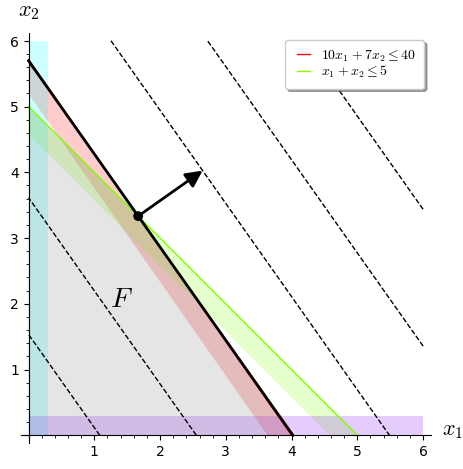

In [2]:
A = matrix([[10, 7], [1, 1]])
b = vector([40, 5])
c = vector([17, 12])
P = InteractiveLPProblemStandardForm(A,b,c)
show(P)
show(plot(P, xmin=0, xmax=6, ymin=0, ymax=6))
plot(P, xmin=0, xmax=6, ymin=0, ymax=6).save('relaksacja.png')

A nuż będziemy mieli szczęście i rozwiązanie optymalne będzie całkowitoliczbowe?

In [3]:
show(P.optimal_solution())

(5/3, 10/3)

Niestety - nie jest. Obie wartości $\frac 53$ i $\frac {10}3$ nie są całkowite. Wybieramy jedną z nich: niech będzie to $x_1 = \frac 53$. Z danego problemu (zrelaksowanego) tworzymy dwa nowe problemy.
W jednym dodajemy nierówność $x_1 \leq 1$ (nazwijmy ten problem P1). W drugim dodajemy nierówność $x_1 \geq 2$ (nazwijmy ten problem P2). Zbiory rozwiązań dopszczalnych tych problemów wyglądają tak:

Pierwszy przypadek - x_1 \leq 1 (problem P1)


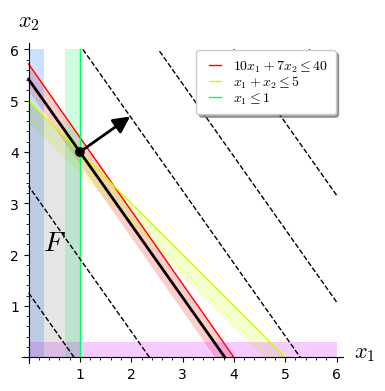

Drugi przypadek-  x_1 \geq 1 (problem P2)


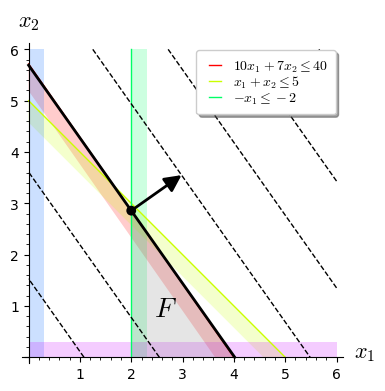

In [3]:
P1 = P.add_constraint([1, 0], 1)
P2 = P.add_constraint([-1, 0], -2)

print(r'Pierwszy przypadek - x_1 \leq 1 (problem P1)')
show(plot(P1, xmin=0, xmax=6, ymin=0, ymax=6))
print(r'Drugi przypadek-  x_1 \geq 1 (problem P2)')
show(plot(P2, xmin=0, xmax=6, ymin=0, ymax=6))

Proszę zauważyć, że optymalne rozwiązanie całkowitoliczbowe naszego problemu będzie w jednym ze zbiorów rozwiązań dopuszczalnych: albo w zbiorze rozwiązań dopuszczalnych P1 albo w zbiorze rozwiązań dopuszczalnych P2. Rozwiążemy więc oba problemy, rekurencyjnie stosując tę samą procedurę podziału problemu (to tytułowe **Branch**). A gdzie **Bound**? Rozwiążmy problem P1.

In [8]:
show(P1.optimal_solution())

(1, 4)

Rozwiązaniem jest punkt $(1, 4)$: obie współrzędne są całkowite. Mamy więc rozwiązanie dopuszczalne oryginalnego problemu całkowitoliczbowego, o wartości funkcji celu $17 \cdot 1 + 12 \cdot 4 = 65$. Nie musi to być rozwiązanie optymalne! Żeby znaleźć rozwiązanie optymalne musimy szukać dalej - może w P2 będą lepsze rozwiązania?

In [9]:
show(P2.optimal_solution())

(2, 20/7)

Optymalne rozwiąznie problemu P2 nie jest całkowitoliczbowe - znowu dzielimy problem na dwa problemy. Tworzymy problem P3 z warunkiem $x_2 \leq \lfloor \frac{20} 7 \rfloor = 2$, a (potem) problem z warunkiem $x_2 \geq 3$.

LP problem (use typeset mode to see details)

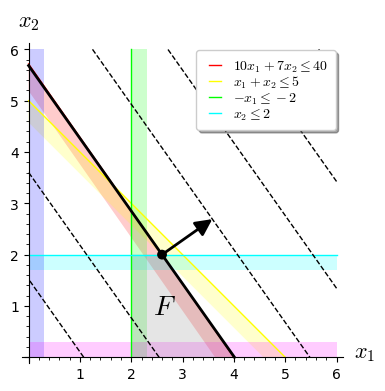

In [12]:
P3 = P2.add_constraint([0, 1], 2)
show(P3)
show(plot(P3, xmin=0, xmax=6, ymin=0, ymax=6))

Jakie jest rozwiązanie optymalne?

In [14]:
show(P3.optimal_solution())
show(float(P3.optimal_value()))

(13/5, 2)

68.2

Optymalne rozwiązanie problemu P3 nie jest całkowitoliczbowe - będziemy dzielić więc dalej. Ale tu możemy zrozumieć czym jest tytułowe **Bound**. Optymalna wartość funkcji celu zrelaksowanego problemu z dotychczas dodanymi cięciami to $68.2$. Mamy już rozwiązanie całkowitoliczbowe o wartości funkcji celu $65$. **Jeżeli** znaleziona tu wartość byłaby mniejsza niż $65$, moglibyśmy w całości odciąć tę gałąź - wartość $68.2$ funkcji celu problemu zrelaksowanego jest górnym ograniczeniem na wartość problemu całkowitoliczbowego. Tu tkwi siła tego algorytmu: możemy odciąć całe obszary zbioru rozwiąząń dopuszczalnych, jeżeli wartość funkcji celu zrelaksowanego problemu na tych obszarach jest mniejsza od wartości problemu całkowitoliczbowego znalezionego w innych gałęziach.

Tu oczywiście odcięcia nie mamy: musimy dzielić dalej. Nie będę tego robił ręcznie: podam całe drzewo obliczeń za książką Vanderbei-a:

<center>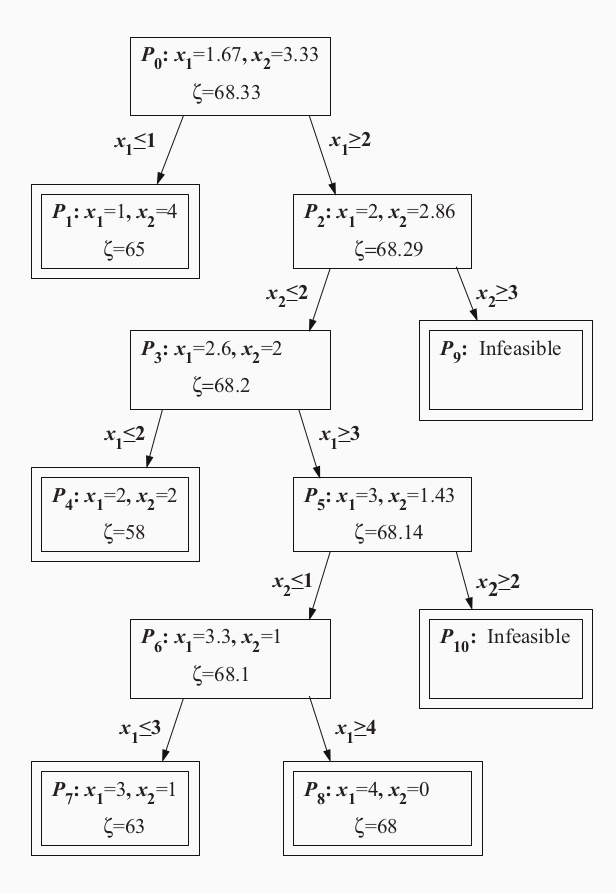</center>